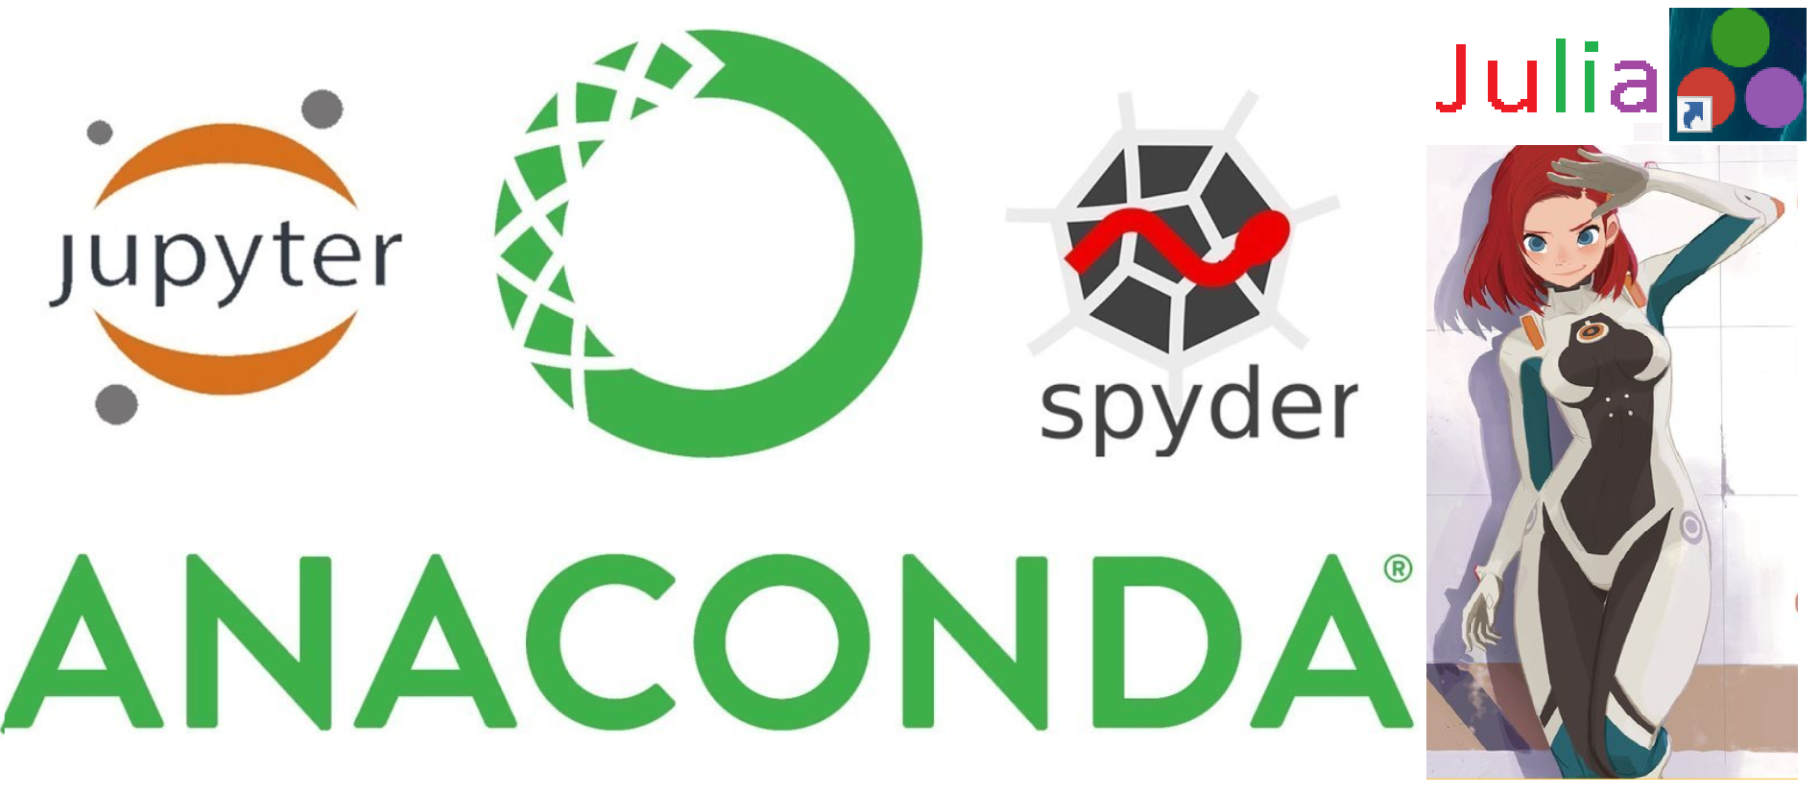

# Julia...
Итак это Гайд по Julia. Сконцентрируемся на программировании.<br/>
Напомном что Julia может работать совместно с Anaconda Jupiter NoteBook.<br/>
Укладывать куски программных кодов при помощи этих технологии бывает проще чем просто через Git.<br/>
Начнем. Первое что возможно придется сделать это накатить парочку пакетов через консоль.<br/>
Или создать. $*$.jl файл. И запустьть вот этот код.

Язык Julia полноправный наследник Python, С++, C#, Java, JavaScript, MASM, FASM, Visual Basic for Applications, Haskell, F#, R, MATLAB и др.<br/>
Язык Julia обладает динамической мультидиспетчерной компиляцией, неявной типизацией и богатейшим синтаксисом.<br/>
Все это в совокупности уже повод изучить его.
Работать можно в консоли, в $∗$.jl файлах из notepad++ и из Jupiter Notebook.
Для Jupiter Notebook придется накатить пакет...

In [1]:
if !true
    using Pkg
    Pkg.add("IJulia")
end;

Julia это довольно сильный язык. Он преодолевает многие проблемы Pyton.<br/>
Разработчики пишут что Julia не привязывает к одному какому нибудь синтаксису. При желанни вы его можете добавить сами. Только вот в этом языке не работает тот привычный для нас синтаксис, что ещё не добавлен.

In [1]:
println("HelloWorld!")
"Hello, World!"|>println
VERSION|>println

HelloWorld!
Hello, World!
1.9.3


# Как создать функцию

Язык настолько хорош, насколько быстро и компактно можно описать алгоритм. По этому не гнущайтесь нового синтаксиса и описания фунций малого объема в одну строку. Скорость чтения программных кодов ограничивается объемом программных кодов, что умещаются на экране.

In [2]:
function Writer1()
	println("Writer1")
end
Writer1()

Writer1


In [3]:
function Writer1()println("Writer1");end;Writer1();

Writer1


In [11]:
Writer2() = println("Writer2");Writer2()

Writer2


In [13]:
Writer3() = (println("1 - Writer3");println("2 - Writer3"););Writer3();

1 - Writer3
2 - Writer3


In [16]:
Writer4() = begin println("Writer4"); end;Writer4();

Writer4


In [18]:
Writer5=()->println("Writer5");Writer5();

Writer5


In [20]:
Writer6=()->begin println("Writer6");println("Writer6");end; Writer6()

Writer6
Writer6


In [22]:
Writer7=()->(println("Writer7");println("Writer7"););Writer7();

Writer7
Writer7


In [4]:
#Пример формы записи сокращенной и полной формы лямбда выражений
"Writer7"|>println
"Writer7"|>x->println
"Writer7"|>x->println(x)
"Writer7"|>(x)->println(x)
"Writer7"|>(x::Core.String)->println(x)
"Writer7"|>(x::Core.String)->(println(x);)

Writer7
Writer7
Writer7
Writer7
Writer7


In [87]:
#Пример о том, что возвращается последнее упомянутое значение... return необязательный
bar() = (x = "Hello, Mars!"; return x)
println(bar())
bar() = (x = "Hello, Mars!";)
println(bar())
bar() = ("!!!!!!!!!!!!!!!!";)
println(bar())

Hello, Mars!
Hello, Mars!
!!!!!!!!!!!!!!!!


In [94]:
#Пример самовозвращаемой функции
function w() println("w");w;end;w()()()

w
w
w


w (generic function with 1 method)

Труба - символ "|>" применяет к текущему значению следующее за ним лямбда выражение
В документации это называется как "Операции, применимые к функциям".
Мы же будем назыать трубой (В стиле $*$.bat файлов).
Этот прием позволяет сэкономить время принаписании программных кодов. Не придется бегать в начало и в конец строки для постановки скобок.

In [7]:
5|>bar|>bar|>bar|>bar|>bar
bar(x) = (print(x,";");x=x+1;return x)
println();
bar(bar(bar(bar(bar(5)))))

LoadError: UndefVarError: `bar` not defined

Также труба позволяет оперировать локальными переменными не создавая их. Создается лямбда контекст существования переменной.

In [8]:
4|>x->(
    x|>println;
    x+2|>println;
    (x-32)|>y->(
        y|>println;
        (y+4)|>println;
    )
)

4
6
-28
-24


Такой подход несет массу плюсов при отладке и разработке высокоуровневых программных кодов.<br/>
Нет необходимости заморачиваться над названиям переменных.<br/>
Все операции что над ними происходят можно дописать по контексту.<br/>
Единственный минус проявляется только тогда когда вы становитись высоко квалифицированным разработциком и начинаете в программном коде обращать внимание на скорость исполнения программного кода. В таком случае вы знаете что каждый вызов функции занимает время примерно сравнимое, большее в 10 раз чем сложение двух переменных.<br/>
Последний тезис имеет значение только в оптимизации низкоуровневых часто повторяемых операций. На этом этапе речь может зайти о написании императивных моноблоков кода в переделах одной функйии, об алгоритмической оптимизации и написании функций в виде моноблоков ассемблерных вставок. На этом этапе имеет смысл прежде чем кидаться в дебри обратить внимание на аппарат макросов. По идее функция макроса вставляет вместо себя свой программный код, чем и икономит время исполнения по сравненнию с вызовом функции. Последние работает в случае полной компиляции приложения. В случае интерпритации - макросы остаются под вопросом, это предмет экспериментов.

# Типы данных

In [1]:
#Как узнать тип переменной
w(x)=(println(".",typeof(x),"=",x);x;)
w|>w

.typeof(w)=w


w (generic function with 1 method)

In [2]:
w(x)=(println(".",typeof(x),"=",x);x;)
Core.Number(0)|>w
#w(Core.Number(0))
Core.Real(8)|>w
Core.Real(9/8)|>w

.Int64=0
.Int64=8
.Float64=1.125


1.125

Обратите внимаение что все конструкторы классов и базовых типов данных являются функциями и для них справедливы теже сфойства, что и для обычных функций...

In [3]:
#Пример явного объявления базовых типов.
w(x)=typeof(x)|>T->".$(lpad(T,7))=$x; [$(typemin(T)),$(typemax(T))]"|>println;
Core.Int8(4)|>w;
Core.Int16(4)|>w;
Core.Int32(4)|>w;
Core.Int64(4)|>w;
Core.Int128(4)|>w;
Core.UInt8(4)|>w;
Core.UInt16(4)|>w;
Core.UInt32(4)|>w;
Core.UInt64(4)|>w;
Core.UInt128(4)|>w;

.   Int8=4; [-128,127]
.  Int16=4; [-32768,32767]
.  Int32=4; [-2147483648,2147483647]
.  Int64=4; [-9223372036854775808,9223372036854775807]
. Int128=4; [-170141183460469231731687303715884105728,170141183460469231731687303715884105727]
.  UInt8=4; [0,255]
. UInt16=4; [0,65535]
. UInt32=4; [0,4294967295]
. UInt64=4; [0,18446744073709551615]
.UInt128=4; [0,340282366920938463463374607431768211455]


Пример, получить всех прородителей класса.
Мы использовали явное указание типа данных, принимаемых функцией.

In [9]:
w(x::Core.DataType)=("$x::"|>print;if(x!=Core.Any);(x|>supertype|>w);else;"Any"|>println;end;);
Core.Int8|>w;
Core.Int16|>w;
Core.Int32|>w;
Core.Int64|>w;
Core.Int128|>w;
Core.UInt8|>w;
Core.UInt16|>w;
Core.UInt32|>w;
Core.UInt64|>w;
Core.UInt128|>w;

Int8::Signed::Integer::Real::Number::Any::Any
Int16::Signed::Integer::Real::Number::Any::Any
Int32::Signed::Integer::Real::Number::Any::Any
Int64::Signed::Integer::Real::Number::Any::Any
Int128::Signed::Integer::Real::Number::Any::Any
UInt8::Unsigned::Integer::Real::Number::Any::Any
UInt16::Unsigned::Integer::Real::Number::Any::Any
UInt32::Unsigned::Integer::Real::Number::Any::Any
UInt64::Unsigned::Integer::Real::Number::Any::Any
UInt128::Unsigned::Integer::Real::Number::Any::Any


Приведем пример, с явным требованием к типу принимаемой величины. Попробуем передать что-то отличное от указанного типа и сразу получим ошибку.<br/> Думаю эта идея весьма проста, понятна и является следствием красоты языка.

In [11]:
4|>(x::Core.Int64)->x|>x->(println(".",typeof(x),"=",x);x;)
4|>(x::Core.Number)->x|>x->(println(".",typeof(x),"=",x);x;)
"Привет Мир"|>(x::Core.String)->x|>x->(println(".",typeof(x),"=",x);x;)

.Int64=4
.Int64=4
.String=Привет Мир


"Привет Мир"

In [16]:
#Задачка на сообразительность. Требуется понять что происходит
w(x)=(println(".",typeof(x),"=",x);x;)
w(x::Core.DataType)=("$x::"|>print;if(x!=Core.Any);(x|>supertype|>w);else;"Any"|>println;end;);
Core.Int64(4)|>w|>repr|>w
Core.Int64|>w

.Int64=4
.String=4
Int64::Signed::Integer::Real::Number::Any::Any


# Ветвления

In [12]:
b=0 
(b==0) ? 0 : (b==1) ? a : "$b" * "*(" * a * ")"

0

In [13]:
b=readline()
if(b==0)
    0|>println
elseif (b==1)
    1|>println
else
    "\"$b\""|>println
end;

stdin> ргшлр
"ргшлр"


In [14]:
b=readline()
if(b==0) 0|>println elseif (b==1) 1|>println else "\"$b\""|>println;end;

stdin> ролр
"ролр"


# Циклы

In [2]:
"Hello world"|>a->map(b -> b,a)
foreach((x::Core.Char)->(print(x)),"Hello world");println("");
foreach(x->print(x),"Hello world");println("");
foreach(x->print,"Hello world");println("!");
foreach(print,"Hello world");println("");

Hello world
Hello world
!
Hello world


In [2]:
x="Hello world"
for i=1:length(x)
    x[i]|>print
end;
""|>println;

Hello world


In [3]:
x="Hello world"
for a in x a|>print;end;

Hello world

# Core.Tuple
Core.Tuple - это кортеж значений. Следующий пример демонстрирует способы извлечения значений из кортежа.

In [2]:
#Существуют именованые  кортежи:
t=(a=2, b=1+2);t.a|>display;t.b|>display

2

3

In [3]:
#Существуют не именованые  кортежи:
t=(2, 1+2);t[1]|>display;t[2]|>display

2

3

In [4]:
t=tuple(1, 'a', pi);t|>display;t|>typeof|>display

(1, 'a', π)

Tuple{Int64,Char,Irrational{:π}}

In [5]:
t=tuple(1, 'a', pi);a,str,MyPi = t;a|>display;str|>display;MyPi|>display

1

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

π = 3.1415926535897...

In [6]:
#Пожалуйсто, пример перебор всех элементов кортежа
for a in (1,2,3) a|>display; end;

1

2

3

In [2]:
#Пример, определение кол-во элементов картежа
(1,2,3)|>length|>display;

3

Для того чтобы перестать бояться картежей этого достаточно. Тем более что на них строятся многие библиотечные функции.